In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
tips_dataframe = sns.load_dataset("tips") #tips_dataframe에 tips data load
tips_dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. 데이터의 정보와 요약통계를 확인하라. (Head&Tail, 데이터 타입, Row&Columns 수, Std, Mean, NaN 수 등등 다다익선)

In [9]:
# head
print(tips_dataframe.head(),"\n") #head()를 통해 상위 5행을 확인 

# tail
print(tips_dataframe.tail(),"\n") #tail()을 통해 하위 5행을 확인

# info(요약정보)
print(tips_dataframe.info(), "\n") # columns 수, data type, class, columns name, memory, non-null(결측치), Row&columns 수

# describe(기술통계)
print(tips_dataframe.describe(include='all')) # columns 별 mean, std, max, min count, 25%~75% 범위의 값(백분위), top(빈도수가 가장 많은 변수), freq(top의 빈도 횟수), unique(중복제외)



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 

     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker     

### 2. 계산 금액과 팁 금액 사이에 어떠한 상관 관계가 있을 것 같다. 두 변수의 관계를 시각화하여 나타내고, 선형적 관계가 보이는지 회귀선까지 그어서 표시해라.

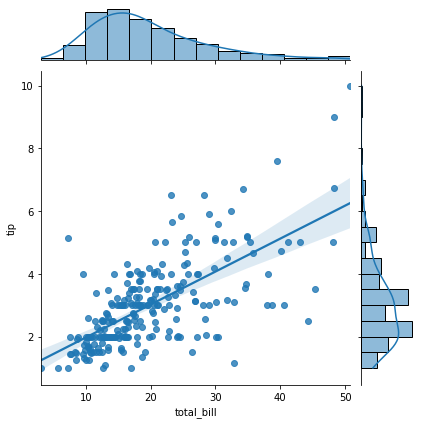

In [10]:
bill_tip_reg= sns.jointplot(x="total_bill", y="tip", kind="reg", data=tips_dataframe) # reg -> regression을 이용하여 hist, 회귀선, scatter 등을 표현.
# 회귀선 주위 그림자는 회귀선의 분산이다.

### 3. 요일별로 팁의 발생 횟수가 어떻게 다른지를 시각화해서 나타내어 보아라. (Countplot 활용)

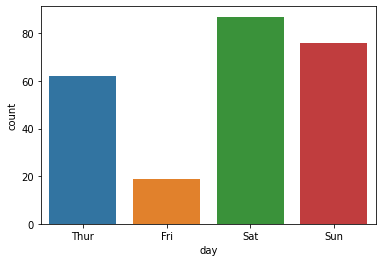

In [9]:
sns.countplot(x='day', data=tips_dataframe ) # countplot을 이용하여 x축에 day 요일별 tip의 발생횟수 표현.
plt.show()

### 4. 요일별 계산금액의 통계적 분포를 한눈에 보고싶다. 시각화해서 나타내어 보아라.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

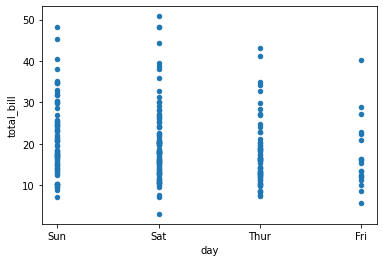

In [18]:
tips_dataframe.plot(kind = 'scatter', x= 'day', y ='total_bill') # scatter를 통해 x축의 요일 y축의 total_bill을 대입하여 요일별로 계산금액이 어떻게 분포하는지 표현함.

### 5. 계산자의 성별에 따라서 테이블 인원수, 팁 금액, 계산금액이 어떠한 관계가 있는지 한눈에 알 수 있도록 시각화하라.

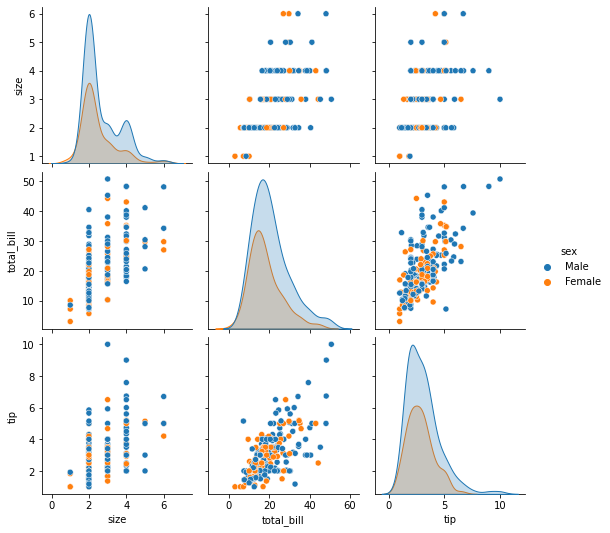

In [37]:
sns.pairplot(tips_dataframe,vars=["size","total_bill","tip"], hue="sex" ) # pairplot을 통해 다변량 변수를 비교할 수 있음. vars를 통해 사용할 컬럼들을 지정한 후 hue에 성별을 대입하여 어떤 관계가 있는지 표현.

### 6. 추가적인 EDA를 진행할 수 있다면 진행하고, 얻어낸 Insight로 음식점의 매출액 혹은 팁 금액을 증대시키기 위한 방안을 제시하라.

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000 



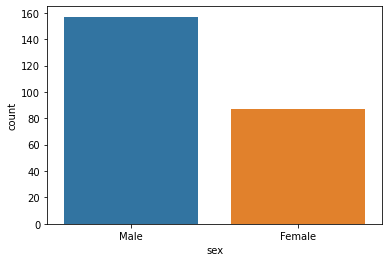

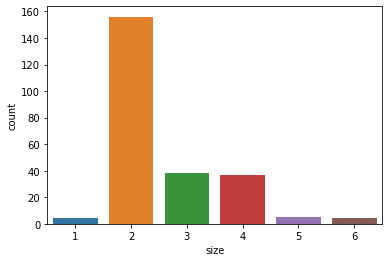

In [54]:
print(tips_dataframe.corr(),"\n") # 상관분석을 통해 상관관계 분석.
sns.countplot(x='sex', data=tips_dataframe) # countplot을 통하여 남성과 여성 중 어떤 성별이 더 많이 이용하며 tip의 발생횟수가 많은지 시각적으로 표현
plt.show()
sns.countplot(x='size', data=tips_dataframe) # countplot을 통하여 이 식당에 몇명의 고객이 자주 이용하는지 확인.
plt.show()

## 매출액과 팁 증대 방안
### 1. 잠재고객층(여성) 유도
- 주로 남자에게서 tip발생 빈도가 높고, 남자고객이 많은 식당이다.<br/>
 이 식당에서 tip과 매출액을 증대시키려면 잠재고객인 여성고객층에 대한 공략이 필요해 보인다.<br/>
 이를 위하여 instagram을 통한 홍보나 감성적인 요소를 더한다.<br/>
 또한 menu에서 가격을 낮춘 small size와 아기자기한 menu를 추가하여 여성 고객층을 유도한다. 

### 2. 개인 혹은 단체 고객 유도
- 이 식당은 2인 고객이 많이 이용하는 것으로 보여진다. <br/>
1인용 set menu를 추가하여 혼자 와서도 부담없이 먹을 수 있도록 1인 고객층을 유도한다.<br/>
또한 family menu나 일정 금액 이상의 할인을 통해 3인 이상의 가족 또는 단체 고객층을 유도한다.